<h1>Processing, Cropping and classifying images & Question Answering and Multi-model Tasks</h1>

<h3>1. Processing images</h3>

In [1]:
from transformers import image_transforms
import matplotlib.pyplot as plt

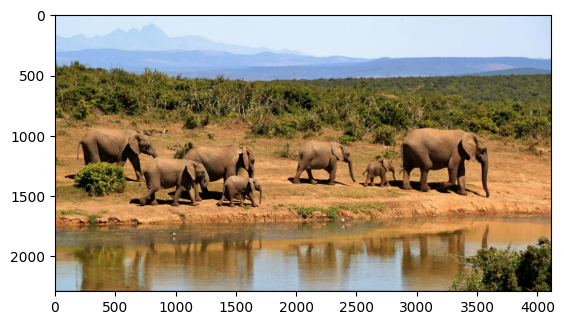

In [2]:
from PIL import Image, ImageOps

original_image = Image.open("data/images/elephants_image.jpg")

img_with_border = ImageOps.expand(original_image, border=1, fill='black')

imgplot = plt.imshow(img_with_border)
plt.show()

In [3]:
import numpy as np

image_array = np.array(original_image)

print(image_array)

[[[208 230 251]
  [208 230 251]
  [207 229 250]
  ...
  [194 216 239]
  [194 216 239]
  [194 216 239]]

 [[208 230 251]
  [208 230 251]
  [208 230 251]
  ...
  [195 217 240]
  [195 217 240]
  [195 217 240]]

 [[208 230 251]
  [208 230 251]
  [208 230 251]
  ...
  [195 217 240]
  [195 217 240]
  [195 217 240]]

 ...

 [[169 198 212]
  [169 198 212]
  [168 197 211]
  ...
  [ 17  10   0]
  [ 20  11   4]
  [ 21  12   3]]

 [[169 198 212]
  [169 198 212]
  [168 197 211]
  ...
  [ 17  10   2]
  [ 20  11   4]
  [ 20  11   4]]

 [[169 198 212]
  [169 198 212]
  [168 197 211]
  ...
  [ 19  10   5]
  [ 21  12   7]
  [ 21  12   7]]]


<h3>2. Cropping images</h3>

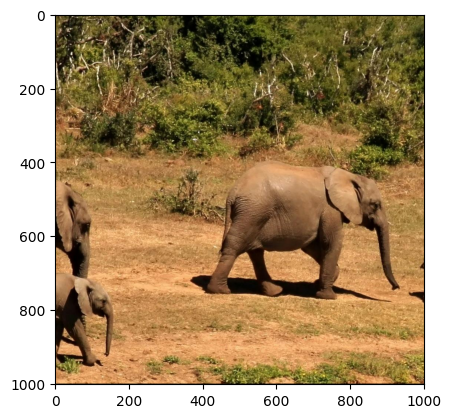

In [4]:
# Assuming img_with_border is your input image
cropped_image = Image.fromarray(image_transforms.center_crop(
    image=np.array(img_with_border),
    size=(1000, 1000),
))

cropped_image_with_border = ImageOps.expand(cropped_image, border=1, fill='black')

# Display the result
imgplot = plt.imshow(cropped_image_with_border)
plt.show()

<h3>3. Image Classification</h3>

In [5]:
from transformers import pipeline

classifier = pipeline(
    task="image-classification",
    model="google/vit-base-patch16-224"
)

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.


In [6]:
# classifier("https://images.pexels.com/photos/59989/elephant-herd-of-elephants-african-bush-elephant-africa-59989.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1")
# classifier("elephants_image.jpg")
classifier(original_image)

[{'label': 'African elephant, Loxodonta africana',
  'score': 0.8458122611045837},
 {'label': 'tusker', 'score': 0.08459408581256866},
 {'label': 'Indian elephant, Elephas maximus', 'score': 0.06706018000841141},
 {'label': 'water buffalo, water ox, Asiatic buffalo, Bubalus bubalis',
  'score': 0.00047815011930651963},
 {'label': 'zebra', 'score': 0.0002107985783368349}]

<h3>4. Question answering and multi-model tasks</h3>

In [7]:
dqa = pipeline(
    task="document-question-answering",
    model="naver-clova-ix/donut-base-finetuned-docvqa"
)

VisionEncoderDecoderModel has generative capabilities, as `prepare_inputs_for_generation` is explicitly overwritten. However, it doesn't directly inherit from `GenerationMixin`. From 👉v4.50👈 onwards, `PreTrainedModel` will NOT inherit from `GenerationMixin`, and this model will lose the ability to call `generate` and other related functions.
  - If you're using `trust_remote_code=True`, you can get rid of this warning by loading the model with an auto class. See https://huggingface.co/docs/transformers/en/model_doc/auto#auto-classes
  - If you are the owner of the model architecture code, please modify your model class such that it inherits from `GenerationMixin` (after `PreTrainedModel`, otherwise you'll get an exception).
  - If you are not the owner of the model architecture class, please contact the model code owner to update it.
C:\Users\MOHAMMEDG\Anaconda3\envs\hf\Lib\site-packages\transformers\tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not

In [8]:
document_image = "data/images/cat_image.jpeg"
question_text = "What is this demo about?"

results = dqa(document_image, question_text)

print(results)

C:\Users\MOHAMMEDG\Anaconda3\envs\hf\Lib\site-packages\transformers\generation\utils.py:1220: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


[{'answer': 'educational'}]


In [9]:
results = dqa(
    image=document_image, 
    question=question_text,
    max_answer_len=15
)

print(results)

[{'answer': 'educational'}]


In [10]:
vqa = pipeline(
    task="visual-question-answering",
    model="dandelin/vilt-b32-finetuned-vqa"
)

results = vqa(
    image="data/images/person_1.jpg", 
    question="What's the person wearing?",
    max_answer_len=15
)

print(results)

[{'score': 0.9538052082061768, 'answer': 'hat'}, {'score': 0.3320969045162201, 'answer': 'beanie'}, {'score': 0.20517942309379578, 'answer': 'sweater'}, {'score': 0.09437020123004913, 'answer': 'cap'}, {'score': 0.03251655027270317, 'answer': 'jacket'}]
